<a href="https://colab.research.google.com/github/kumar-abhishek/imbalanced-machine-learning-book/blob/main/chapter-4/Code_ensemble_methods_used_in_chapter_4_docx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install imbalanced-learn==0.10.1
import warnings
warnings.filterwarnings('ignore')

# Plotting helper function

In [2]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score

def plot_dataset(X, y):
  cmap_bold = ["darkorange", "darkblue"]
  markers = {1: "X", 0: "v"}
  sns.scatterplot(
      x=X[:, 0],
      y=X[:, 1],
      hue=y,
      palette=cmap_bold,
      alpha=1.0,
      edgecolor="black",
      style=y, markers=markers
  )
  
def plot_decision_boundary(X, y, clf, clf_name):
  _, ax = plt.subplots()
  cmap_light = ListedColormap(["orange", "white"])
  disp = DecisionBoundaryDisplay.from_estimator(
      clf,
      X,
      cmap=cmap_light,
      ax=ax,
      response_method="predict",
      alpha=0.5,
      xlabel='feature_1',
      ylabel='feature_2',
  )
  disp.plot(plot_method="contour", cmap="gist_gray", ax = ax, alpha = 1.)
  # Plot also the training points
  plot_dataset(X, y)
  plt.title("2-Class classification using %s classifier" %clf_name)


# from: https://imbalanced-learn.org/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py
def plot_decision_function(X, y, clf, ax):
  """Plot the decision function of the classifier and the original data"""
  plot_step = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
  )

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.4)
  ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
  ax.set_title(f"Resampling using {clf[0].__class__.__name__}")

# Create dataset

y_train:  Counter({0: 62370, 1: 630})
y_test:  Counter({0: 26730, 1: 270})


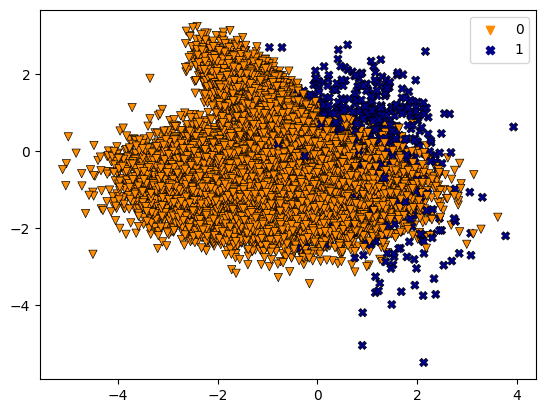

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter

X, y = make_classification(n_samples=90000, n_features=2, 
                          n_redundant=0, n_classes=2, flip_y=0,
                          n_clusters_per_class=2, class_sep=0.89,
                          weights=[0.99], random_state=81)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

print('y_train: ', Counter(y_train))
print('y_test: ', Counter(y_test))

plot_dataset(X_train, y_train)

In [4]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0, stratify=y_train)

# Random Forest

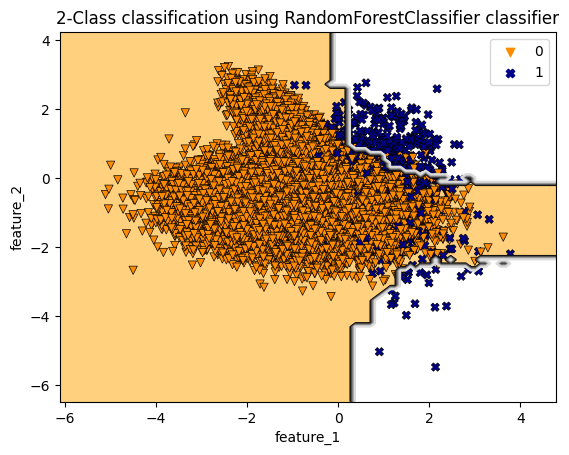

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.35      1.00      0.59      0.37     26730
          1       0.89      0.35      1.00      0.50      0.59      0.33       270

avg / total       0.99      0.99      0.35      0.99      0.59      0.37     27000



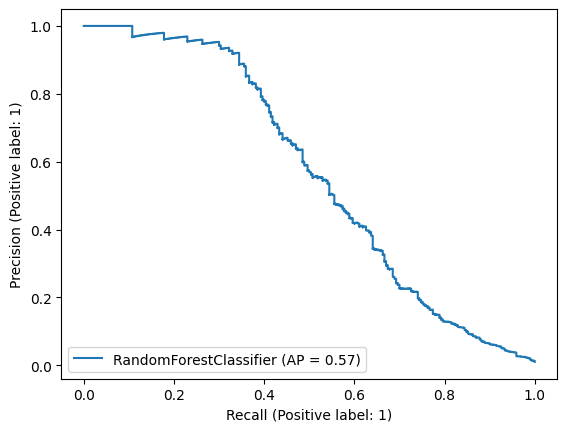

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from imblearn.metrics import classification_report_imbalanced

RF_clf = RandomForestClassifier(random_state=0, max_depth=6).fit(X_tr, y_tr)

plot_decision_boundary(X_tr, y_tr, RF_clf, 'RandomForestClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(RF_clf, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier")

y_pred = RF_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

# Balanced Random Forest with undersampling

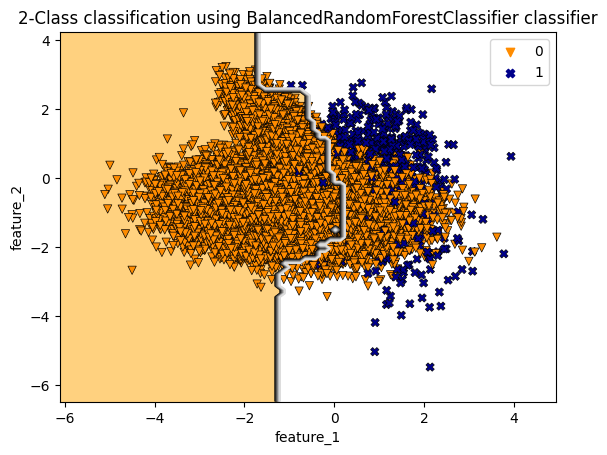

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.90      0.89      0.94      0.89      0.79     26730
          1       0.08      0.89      0.90      0.14      0.89      0.79       270

avg / total       0.99      0.90      0.89      0.94      0.89      0.79     27000



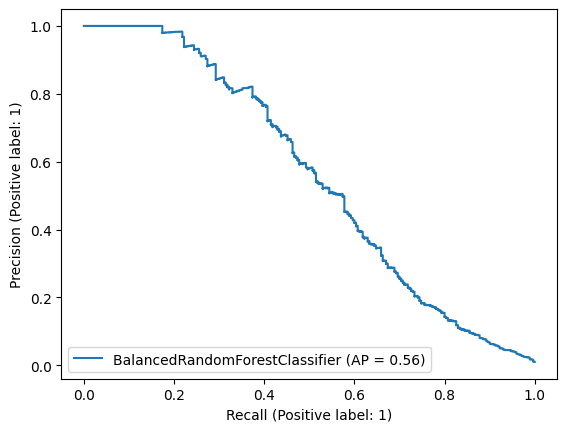

In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay

balanced_RF_clf = BalancedRandomForestClassifier(random_state=0, max_depth=6).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, balanced_RF_clf, 'BalancedRandomForestClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(balanced_RF_clf, X_test, y_test, ax = plt.gca(),name = "BalancedRandomForestClassifier")

y_pred = balanced_RF_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

# BaggingClassifier

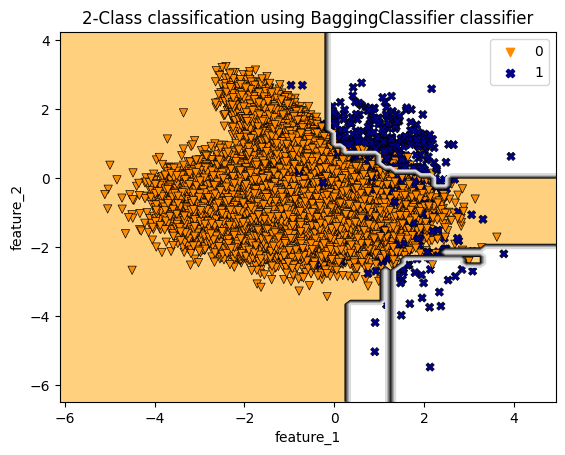

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.40      1.00      0.64      0.43     26730
          1       0.83      0.40      1.00      0.54      0.64      0.38       270

avg / total       0.99      0.99      0.41      0.99      0.64      0.43     27000



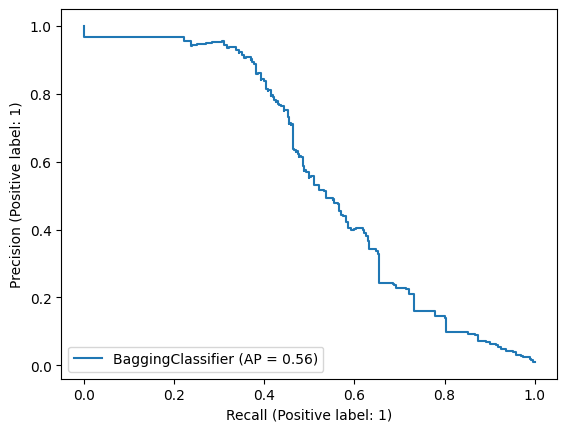

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.tree import DecisionTreeClassifier

clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6), random_state=0).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, clf, 'BaggingClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")

y_pred = clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

# Underbagging via BalancedBaggingClassifier



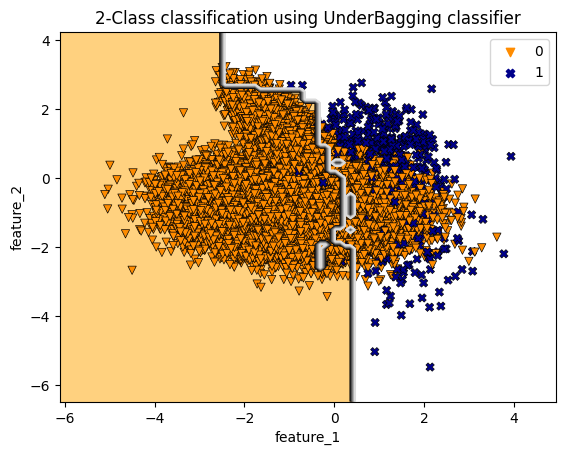

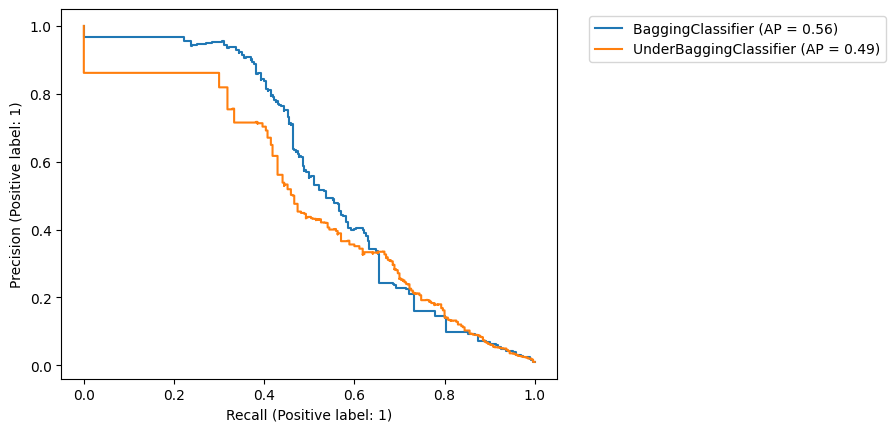

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.90      0.88      0.95      0.89      0.80     26730
          1       0.08      0.88      0.90      0.15      0.89      0.79       270

avg / total       0.99      0.90      0.88      0.94      0.89      0.80     27000



In [8]:
import imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
underbagging_clf = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6), 
                                             random_state=0,
                                             sampler=imblearn.under_sampling.RandomUnderSampler(replacement=True)
                                             ).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, underbagging_clf, 'UnderBagging')
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax = plt.gca(),name = "UnderBaggingClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


y_pred = underbagging_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

# Overbagging via BalancedBaggingClassifier



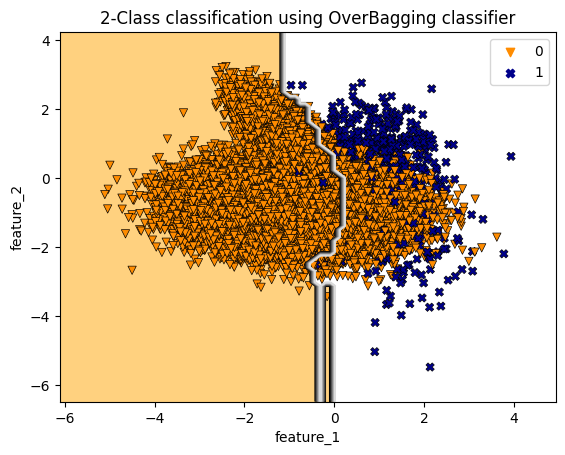

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.90      0.87      0.95      0.89      0.79     26730
          1       0.08      0.87      0.90      0.15      0.89      0.79       270

avg / total       0.99      0.90      0.87      0.94      0.89      0.79     27000



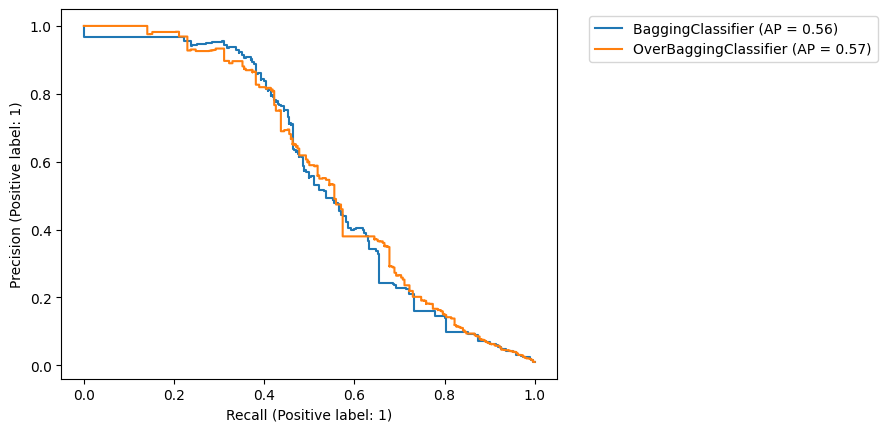

In [9]:
import imblearn
from imblearn.ensemble import BalancedBaggingClassifier

overbagging_clf = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6), 
                                            random_state=0, 
                                            sampler=imblearn.over_sampling.RandomOverSampler(shrinkage=1))\
                                            .fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, overbagging_clf, 'OverBagging')
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(overbagging_clf, X_test, y_test, ax = plt.gca(),name = "OverBaggingClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


y_pred = overbagging_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

# SMOTEBagging via BalancedBaggingClassifier

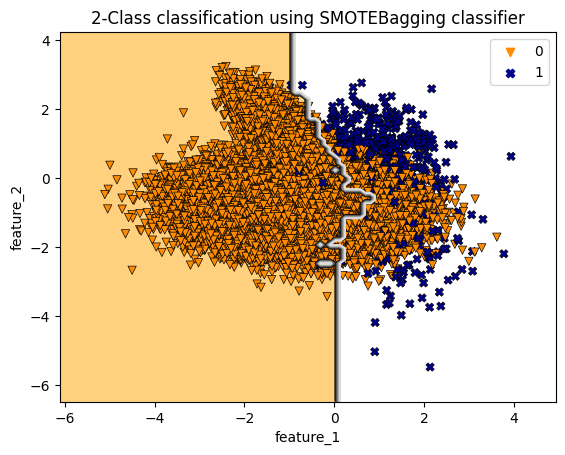

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.93      0.84      0.96      0.88      0.79     26730
          1       0.11      0.84      0.93      0.19      0.88      0.77       270

avg / total       0.99      0.93      0.84      0.96      0.88      0.79     27000



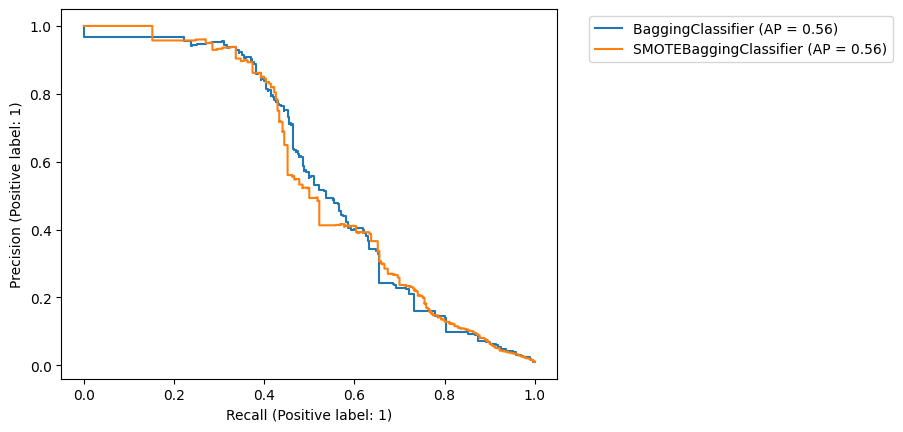

In [10]:
import imblearn
from imblearn.ensemble import BalancedBaggingClassifier

smotebagging_clf = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                                             random_state=0, 
                                             sampler=imblearn.over_sampling.SMOTE()).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, smotebagging_clf, 'SMOTEBagging')
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(smotebagging_clf, X_test, y_test, ax = plt.gca(),name = "SMOTEBaggingClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


y_pred = smotebagging_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))


# Boosting Classifier via sklearn.ensemble.AdaBoostClassifier

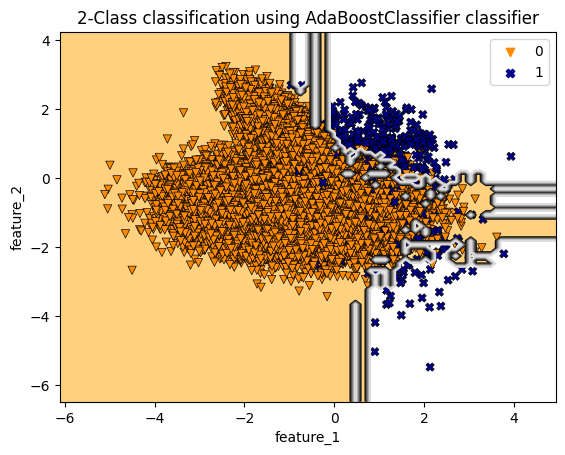

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.42      1.00      0.65      0.45     26730
          1       0.60      0.42      1.00      0.50      0.65      0.40       270

avg / total       0.99      0.99      0.43      0.99      0.65      0.44     27000



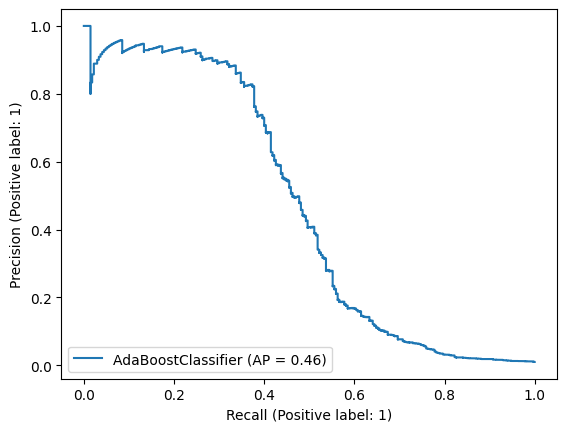

In [11]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(random_state=0, estimator=DecisionTreeClassifier(max_depth=6)).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, adaboost_clf, 'AdaBoostClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier")


y_pred = adaboost_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))


# RUSBoostClassifier

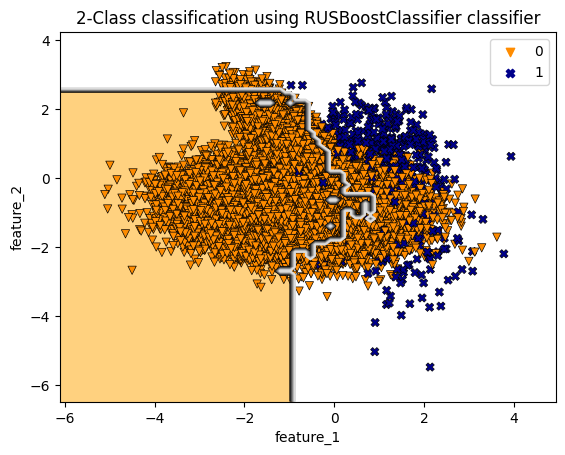

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.91      0.87      0.95      0.89      0.79     26730
          1       0.08      0.87      0.91      0.15      0.89      0.78       270

avg / total       0.99      0.90      0.87      0.94      0.89      0.79     27000



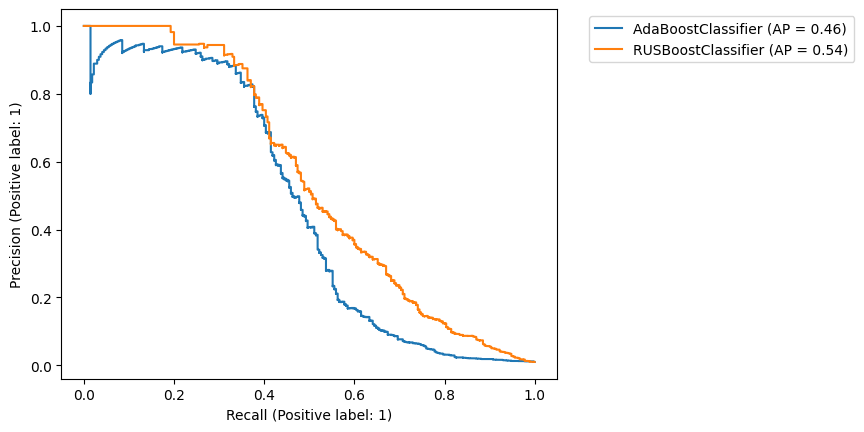

In [12]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rusboost_clf = RUSBoostClassifier(random_state=0, estimator=DecisionTreeClassifier(max_depth=6)).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, rusboost_clf, 'RUSBoostClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier")
PrecisionRecallDisplay.from_estimator(rusboost_clf, X_test, y_test, ax = plt.gca(),name = "RUSBoostClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


y_pred = rusboost_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))


# EasyEnsemble

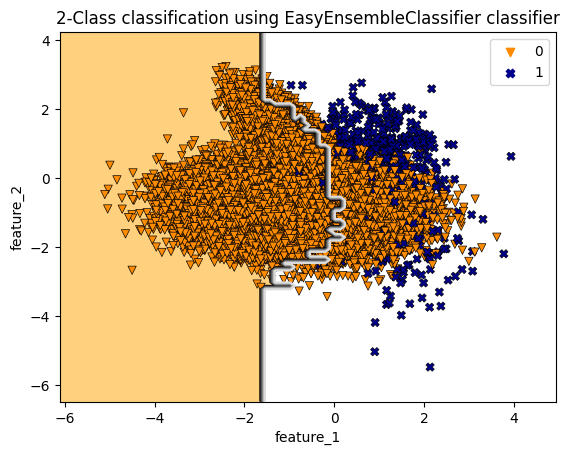

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.86      0.91      0.93      0.89      0.79     26730
          1       0.06      0.91      0.86      0.12      0.89      0.79       270

avg / total       0.99      0.87      0.91      0.92      0.89      0.79     27000



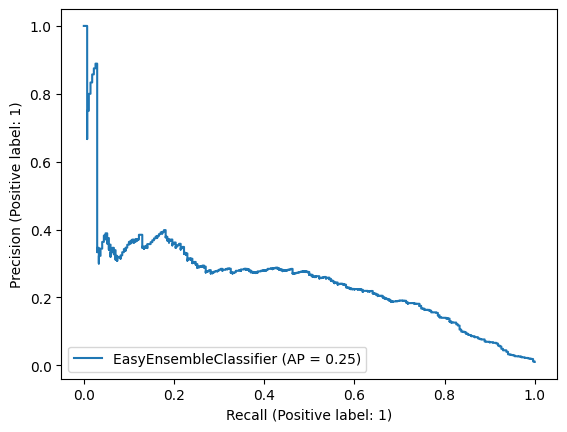

In [13]:
from imblearn.ensemble import EasyEnsembleClassifier

easyensemble_clf = EasyEnsembleClassifier(random_state=0).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, easyensemble_clf, 'EasyEnsembleClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")


y_pred = easyensemble_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))


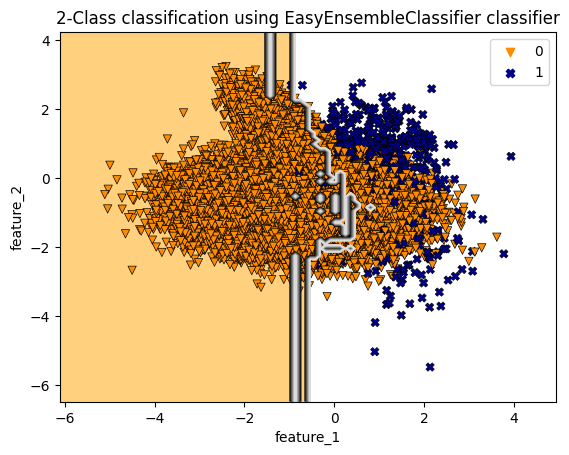

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.89      0.89      0.94      0.89      0.79     26730
          1       0.07      0.89      0.89      0.14      0.89      0.79       270

avg / total       0.99      0.89      0.89      0.93      0.89      0.79     27000



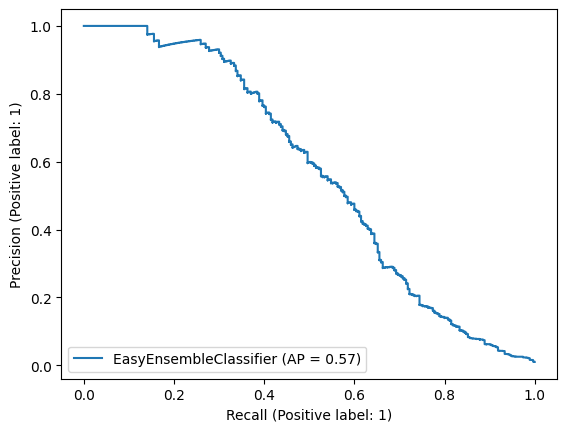

In [14]:
from imblearn.ensemble import EasyEnsembleClassifier
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay

easyensemble_clf = EasyEnsembleClassifier(n_estimators=20, 
                                          random_state=42, 
                                          estimator=xgb.XGBClassifier(objective="binary:logistic",random_state=42))\
                                          .fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, easyensemble_clf, 'EasyEnsembleClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")

 
y_pred = easyensemble_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))


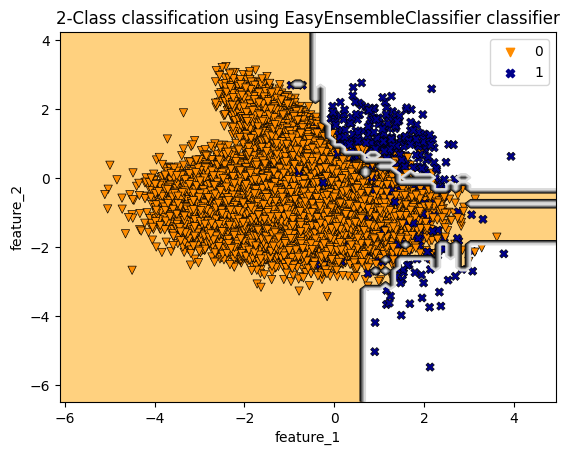

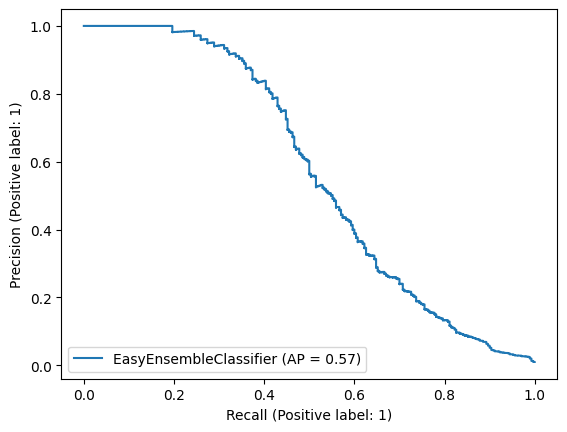

In [19]:
from imblearn.ensemble import EasyEnsembleClassifier
import xgboost as xgb

easyensemble_clf = EasyEnsembleClassifier(n_estimators=20, sampling_strategy='not majority', random_state=42, estimator=xgb.XGBClassifier(objective="binary:logistic",random_state=42)).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, easyensemble_clf, 'EasyEnsembleClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")


y_pred = easyensemble_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))


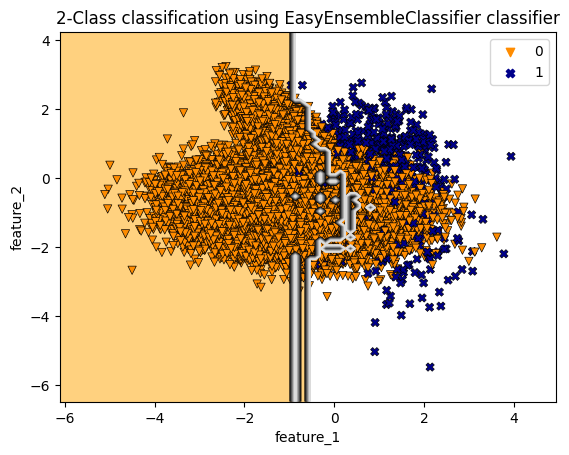

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.89      0.87      0.94      0.88      0.78     26730
          1       0.07      0.87      0.89      0.14      0.88      0.78       270

avg / total       0.99      0.89      0.87      0.93      0.88      0.78     27000



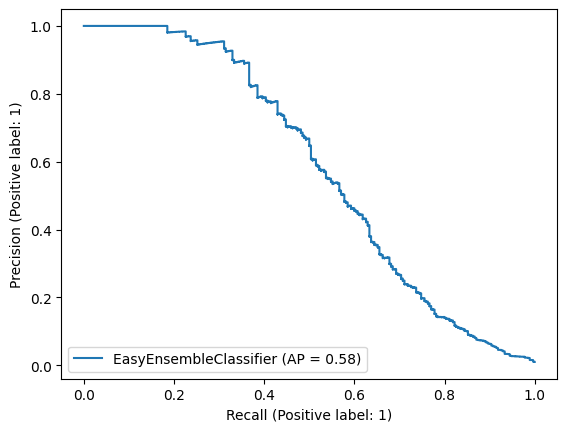

In [34]:
from imblearn.ensemble import EasyEnsembleClassifier
import xgboost as xgb

easyensemble_clf = EasyEnsembleClassifier(n_estimators=70, random_state=42, base_estimator=xgb.XGBClassifier(random_state=42)).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, easyensemble_clf, 'EasyEnsembleClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")


y_pred = easyensemble_clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))


# Final comparison

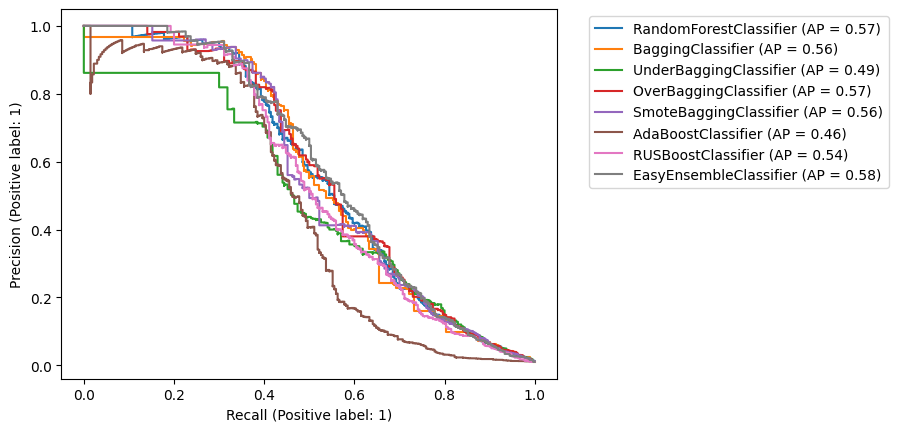

In [35]:
PrecisionRecallDisplay.from_estimator(RF_clf, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier")
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax = plt.gca(),name = "UnderBaggingClassifier")
PrecisionRecallDisplay.from_estimator(overbagging_clf, X_test, y_test, ax = plt.gca(),name = "OverBaggingClassifier")
PrecisionRecallDisplay.from_estimator(smotebagging_clf, X_test, y_test, ax = plt.gca(),name = "SmoteBaggingClassifier")
PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier")
PrecisionRecallDisplay.from_estimator(rusboost_clf, X_test, y_test, ax = plt.gca(),name = "RUSBoostClassifier")
PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

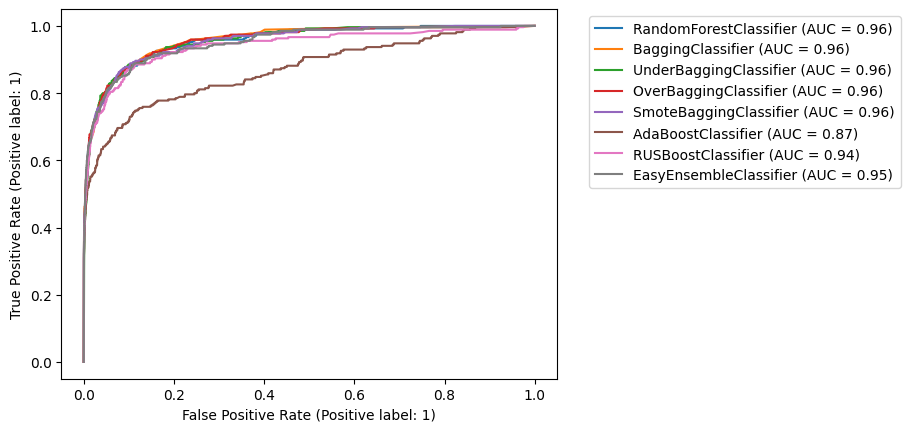

In [40]:
RocCurveDisplay.from_estimator(RF_clf, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier")
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
RocCurveDisplay.from_estimator(underbagging_clf, X_test, y_test, ax = plt.gca(),name = "UnderBaggingClassifier")
RocCurveDisplay.from_estimator(overbagging_clf, X_test, y_test, ax = plt.gca(),name = "OverBaggingClassifier")
RocCurveDisplay.from_estimator(smotebagging_clf, X_test, y_test, ax = plt.gca(),name = "SmoteBaggingClassifier")
RocCurveDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier")
RocCurveDisplay.from_estimator(rusboost_clf, X_test, y_test, ax = plt.gca(),name = "RUSBoostClassifier")
RocCurveDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

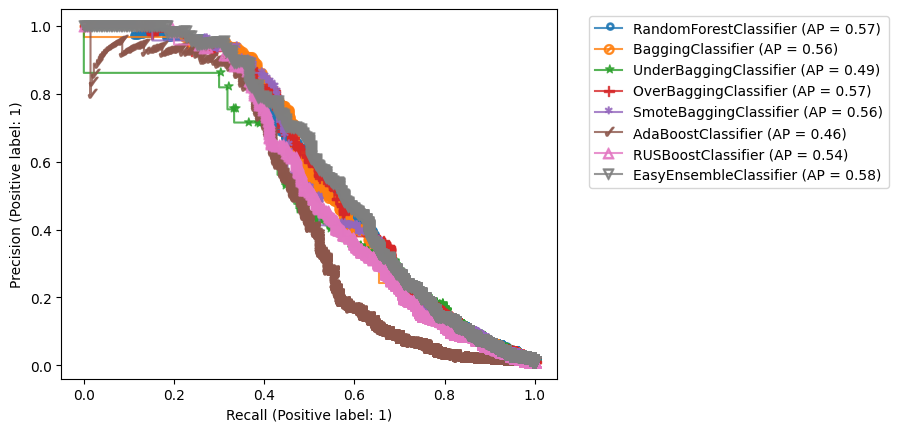

In [36]:
def kwargs(num):
  return {'alpha': 0.8, 'marker': getRandomMarker(num), 'markersize': 8}

markers = ['\circ', '\oslash', 
           '\star', '+', '*',
            '\\checkmark', '\\vartriangle', '\\triangledown', '\\blacktriangle']

def getRandomMarker(i):
  return "$"+markers[i]+"$"

PrecisionRecallDisplay.from_estimator(RF_clf, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier", **kwargs(0))
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier", **kwargs(1))
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax = plt.gca(),name = "UnderBaggingClassifier", **kwargs(2))
PrecisionRecallDisplay.from_estimator(overbagging_clf, X_test, y_test, ax = plt.gca(),name = "OverBaggingClassifier", **kwargs(3))
PrecisionRecallDisplay.from_estimator(smotebagging_clf, X_test, y_test, ax = plt.gca(),name = "SmoteBaggingClassifier", **kwargs(4))
PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier", **kwargs(5))
PrecisionRecallDisplay.from_estimator(rusboost_clf, X_test, y_test, ax = plt.gca(),name = "RUSBoostClassifier", **kwargs(6))
PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier", **kwargs(7))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
